# Importing the libraries

In [1]:
# For data analysis and manipulation
import pandas as pd
import numpy as np

# For data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For data processing and cleaning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [2]:
# Reading the data from the csv file using read_csv() method
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory data analysis

In [3]:
# Checking any 5 random rows from the dataframe
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5817,5818,15656865,Gray,613,Germany,Male,69,9,78778.49,1,0,1,8751.59,0
8264,8265,15710111,Clark,742,France,Male,33,6,0.00,2,0,0,38550.40,0
1309,1310,15690079,Boniwell,591,Spain,Male,30,8,124857.69,2,0,0,50485.70,0
715,716,15578977,Robinson,786,France,Male,34,9,0.00,2,1,0,144517.19,0
5353,5354,15782181,Greco,592,Spain,Male,35,6,80285.16,1,1,0,72678.75,1


In [4]:
# Checking the shape of the dataframe
df.shape

(10000, 14)

In [5]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Optimizing the memory occupied by using the appropriate datatypes
int_cols = df.select_dtypes(include=np.int64)
int_cols = int_cols.columns
df[int_cols] = df[int_cols].astype(np.int32)

float_cols = df.select_dtypes(include=np.float64)
float_cols = float_cols.columns
df[float_cols] = df[float_cols].astype(np.float32)

In [7]:
# Let's get some descriptive information about our dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.890625,1.530200,0.70550,0.515100,100090.234375,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.406250,0.581654,0.45584,0.499797,57510.492188,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.109375,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.539062,1.000000,1.00000,1.000000,100193.914062,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.238281,2.000000,1.00000,1.000000,149388.253906,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.093750,4.000000,1.00000,1.000000,199992.484375,1.000000


In [8]:
# Let's check the percentage of null values
df.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [9]:
# Let's check if there are any duplicated values
df.duplicated().sum()

0

<AxesSubplot:ylabel='Exited'>

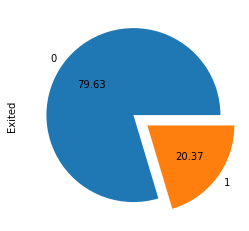

In [10]:
# Distribution of data in target variable
ex = (0,0.2)
df['Exited'].value_counts().plot(kind='pie',autopct='%.2f',explode= ex)

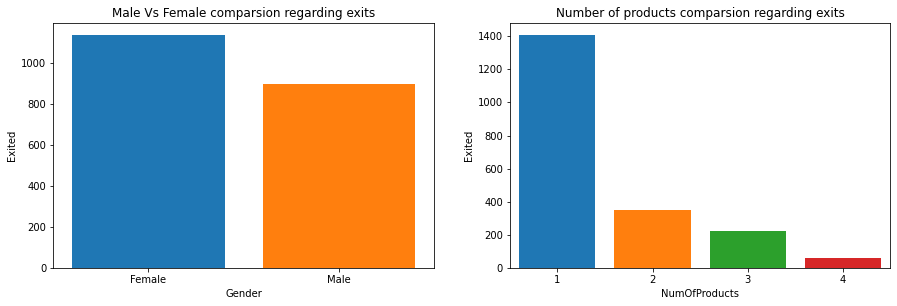

In [11]:
# Let's plot barplots to find out answer to the questions
fig,ax = plt.subplots(1,2,figsize =(15,4.5))

temp1 = df.groupby('Gender')['Exited'].sum()
temp2 = df.groupby('NumOfProducts')['Exited'].sum()

sns.barplot(x = temp1.index , y = temp1,saturation=2,ax = ax[0]).set(title='Male Vs Female comparsion regarding exits')
sns.barplot(x = temp2.index , y = temp2,saturation=2,ax = ax[1]).set(title='Number of products comparsion regarding exits')
plt.show()

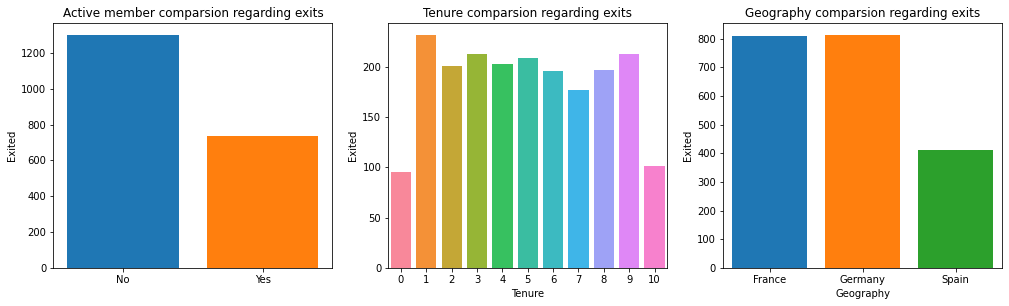

In [12]:
# Let's plot barplots to find out answer to the questions
fig,ax = plt.subplots(1,3,figsize =(17,4.5))

temp3 = df.groupby('IsActiveMember')['Exited'].sum()
temp4 = df.groupby('Tenure')['Exited'].sum()
temp5 = df.groupby('Geography')['Exited'].sum()

sns.barplot(x = ['No','Yes'] , y = temp3,saturation=2,ax = ax[0]).set(title='Active member comparsion regarding exits')
sns.barplot(x = temp4.index , y = temp4,saturation=2,ax = ax[1]).set(title='Tenure comparsion regarding exits')
sns.barplot(x = temp5.index , y = temp5,saturation=2,ax = ax[2]).set(title='Geography comparsion regarding exits')
plt.show()

# Data cleaning

Let's visualize the distribution of some numerical features so that we could decide whether to use IQR or z SCORE method for detecting and dealing with outliers

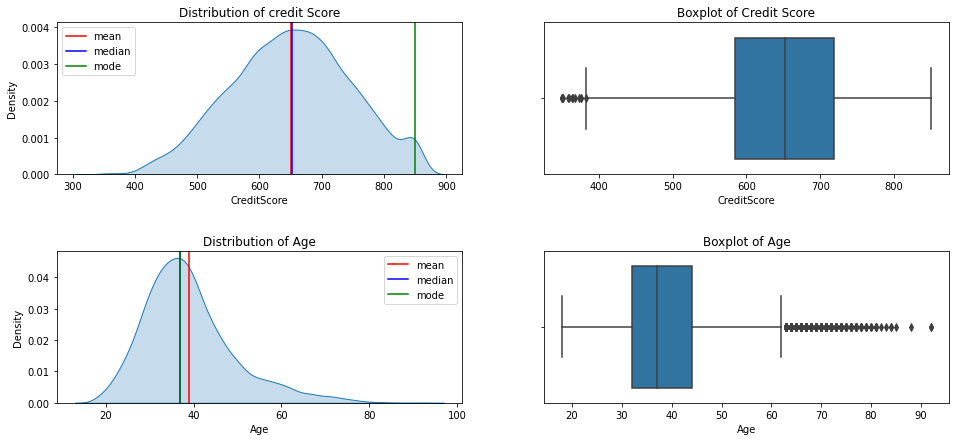

In [13]:
fig,ax = plt.subplots(2,2,figsize=(16,7))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

sns.kdeplot(df['CreditScore'],shade=True,ax = ax[0][0]).set(title='Distribution of credit Score')
ax[0][0].axvline(df['CreditScore'].mean(),color='red',label='mean')
ax[0][0].axvline(df['CreditScore'].median(),color='blue',label='median')
ax[0][0].axvline(df['CreditScore'].mode().values[0],color='green',label='mode')
ax[0][0].legend()
sns.boxplot(x = df['CreditScore'],ax = ax[0][1]).set(title='Boxplot of Credit Score')

sns.kdeplot(df['Age'],shade=True,ax = ax[1][0]).set(title='Distribution of Age')
ax[1][0].axvline(df['Age'].mean(),color='red',label='mean')
ax[1][0].axvline(df['Age'].median(),color='blue',label='median')
ax[1][0].axvline(df['Age'].mode().values[0],color='green',label='mode')
sns.boxplot(x = df['Age'],ax = ax[1][1]).set(title='Boxplot of Age')
ax[1][0].legend()

plt.show()

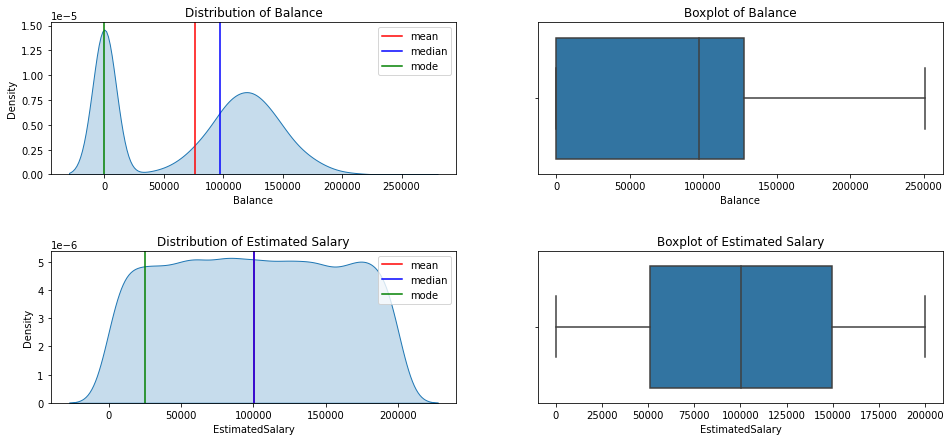

In [14]:
fig,ax = plt.subplots(2,2,figsize=(16,7))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

sns.kdeplot(df['Balance'],shade=True,ax = ax[0][0]).set(title='Distribution of Balance')
ax[0][0].axvline(df['Balance'].mean(),color='red',label='mean')
ax[0][0].axvline(df['Balance'].median(),color='blue',label='median')
ax[0][0].axvline(df['Balance'].mode().values[0],color='green',label='mode')
sns.boxplot(x = df['Balance'],ax = ax[0][1]).set(title='Boxplot of Balance')
ax[0][0].legend()


sns.kdeplot(df['EstimatedSalary'],shade=True,ax = ax[1][0]).set(title='Distribution of Estimated Salary')
ax[1][0].axvline(df['EstimatedSalary'].mean(),color='red',label='mean')
ax[1][0].axvline(df['EstimatedSalary'].median(),color='blue',label='median')
ax[1][0].axvline(df['EstimatedSalary'].mode().values[0],color='green',label='mode')
sns.boxplot(x = df['EstimatedSalary'],ax = ax[1][1]).set(title='Boxplot of Estimated Salary')
ax[1][0].legend()
plt.show()

Since none of the above feature is having normal or sort of normal distribution thus we will use inter quartile range method for the detecting and handing outliers.

Also as we can clearly see that Age and Credit Score features have some outliers and now to handle these outliers we can either remove them or we can simply cap them. So we will do and compare the distribution before and after remvoing/capping outliers with respect to the original distribution

In [15]:
# Let's create 2 copies 
cap_df = df[['Age','CreditScore']].copy()
remove_df = df[['Age','CreditScore']].copy()

In [16]:
# Creating function for finding upper and lower limit of the feature
def find_ul_ll(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + (1.5*IQR)
    Lower_lmt = q1 - (1.5*IQR)
    return [Upper_lmt,Lower_lmt]

In [17]:
# Let's cap the outliers
for col in cap_df.columns:
    lmts = find_ul_ll(cap_df[col])
    cap_df[col] = np.where(cap_df[col] > lmts[0],lmts[0], 
                           np.where(cap_df[col]<lmts[1],lmts[1],cap_df[col]))

In [18]:
# Let's find limits to remove the outliers
lmts_age = find_ul_ll(remove_df['Age'])
lmts_creditsc = find_ul_ll(remove_df['CreditScore'])

remove_df = remove_df[remove_df['Age'] < lmts_age[0]]
remove_df = remove_df[remove_df['CreditScore'] > lmts_creditsc[1]]

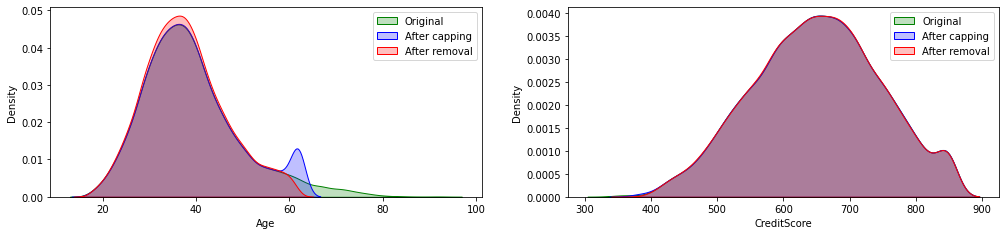

In [19]:
# Let's now visualize the change in distribution after capping/remvoing outliers
fig,ax = plt.subplots(1,2,figsize=(17,3.5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

sns.kdeplot(df['Age'],shade=True,ax = ax[0],color='green',label='Original')
sns.kdeplot(cap_df['Age'],shade=True,ax = ax[0],color='blue',label='After capping')
sns.kdeplot(remove_df['Age'],shade=True,ax = ax[0],color='red',label='After removal')
ax[0].legend()

sns.kdeplot(df['CreditScore'],shade=True,ax = ax[1],color='green',label='Original')
sns.kdeplot(cap_df['CreditScore'],shade=True,ax = ax[1],color='blue',label='After capping')
sns.kdeplot(remove_df['CreditScore'],shade=True,ax = ax[1],color='red',label='After removal')
ax[1].legend()

plt.show()

In Age feature the disitribution is chaning a lot after capping the outliers, thus we will go on with removing the outliers whereas in case of Credit Score we will cap the outilers because the distribution is not chaning a lot after removing or capping.

In [20]:
# Removing outiers from the Age feature in the original dataframe
df = df[df['Age'] < lmts_age[0]]

# Capping the outliers in the Credit Score feature of original dataframe
df['CreditScore'] = np.where(df['CreditScore']>lmts_creditsc[0],lmts_creditsc[0],
                             np.where(df['CreditScore']<lmts_creditsc[1],lmts_creditsc[1],df['CreditScore']))

# Feature engineering

- Feature transformation
- Feature selection
- Feature extraction
- Feature scaling

In [21]:
# Let's drop unnecessary features
df.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [22]:
# Train test split 
y = df['Exited']
X = df.drop(['Exited'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [23]:
# instantiate the OneHotEncoder object
ohe = OneHotEncoder(drop='first',dtype = np.int32)

# fit and transform the training data Gender column and store the results in a new DataFrame
X_train_gender_ohe = pd.DataFrame(ohe.fit_transform(X_train[['Gender']]).toarray(), columns=ohe.get_feature_names(['Gender']))

# transform the test data Gender column and store the results in a new DataFrame
X_test_gender_ohe = pd.DataFrame(ohe.transform(X_test[['Gender']]).toarray(), columns=ohe.get_feature_names(['Gender']))

# drop the original Gender column from both the training and test datasets
X_train = X_train.drop(['Gender'], axis=1)
X_test = X_test.drop(['Gender'], axis=1)

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
# Resetting the index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_train_gender_ohe.reset_index(inplace=True,drop=True)
X_test_gender_ohe.reset_index(inplace=True,drop=True)

In [25]:
# concatenate the one-hot-encoded Gender columns to the training and test datasets
X_train = pd.concat([X_train, X_train_gender_ohe], axis=1)
X_test = pd.concat([X_test, X_test_gender_ohe], axis=1)

<AxesSubplot:>

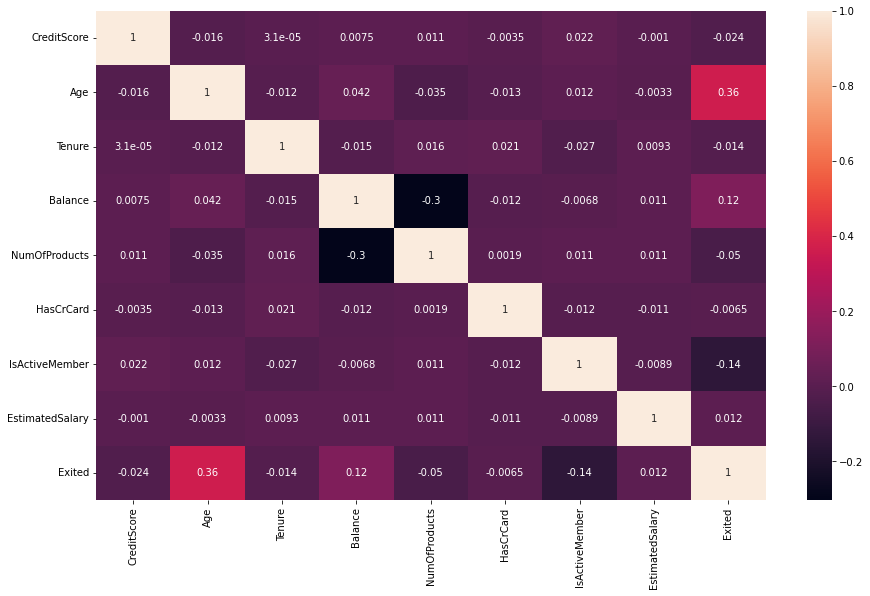

In [27]:
# Let's plot a heatmap to visualize the correlation between the variables
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [29]:
# Let's create an object of MinMax scaler
scaler = MinMaxScaler()

In [30]:
# Let's normalize the values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model or Neural network training

In [ ]:
# Let's create an object of Sequential class to build a neural network architecture
model = Sequential()

# Let's add layers 
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# let's compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the neural network
model.fit(X_train,y_train, epochs=150, batch_size=10)

# Model evaluation

In [ ]:
# Evaluating the network
_, accuracy = model.evaluate(X_train, y_train)
print("Model accuracy: %.2f"% (accuracy*100))